# Getting Milliseconds From YouTube

In [ ]:
# Run this cell to mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Right click on video or click 3 dots.

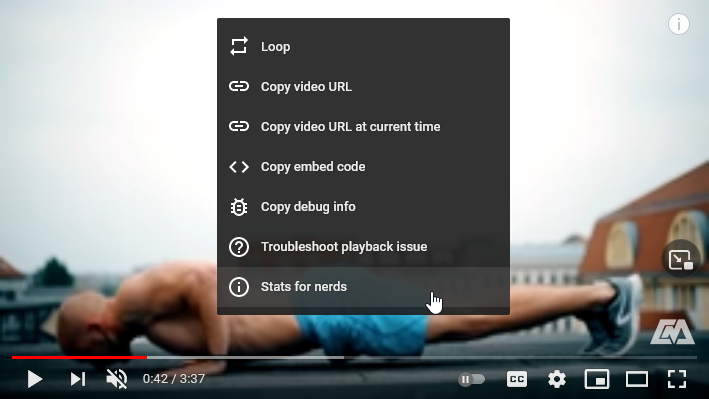

Millisecond information is after "t:" in Mystery Text. You can move by frame by pressing "<" or ">" on keyboard.

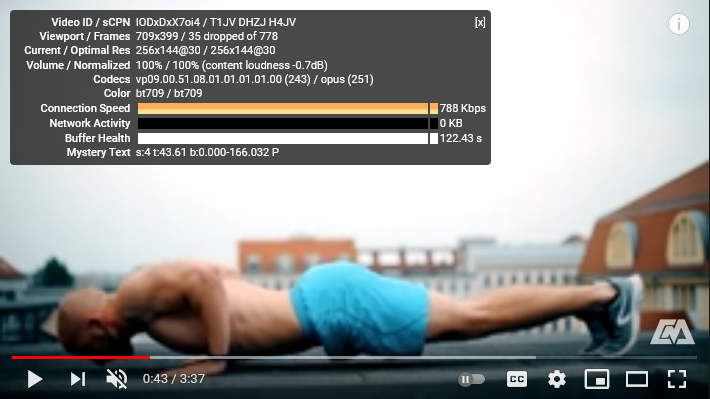

# Input Timestamp (Milliecond) From Video

In [ ]:
second_list = []

# timestamps input
print("Input blank to stop.")
while True:
  inputs = input("Millisecond " + str(len(second_list)+1) + ": ")

  # stop loop
  if inputs == '':
    break

  # convert to integer
  try:
    inputs = float(inputs)
  except ValueError:
    print("Input must be a number.")
    continue
  
  if inputs < 0:
    print("Inputs cannot be lower than 0.")
    continue

  second_list.append(inputs)

# show list
print('second_list: ', second_list)

Input blank to stop.
Millisecond 1: 18.41


# Extract Frame From Video

In [ ]:
pip install youtube_dl

     |████████████████████████████████| 1.9MB 25.2MB/s 


In [ ]:
import cv2
import numpy as np
import youtube_dl

# for Google Colab
from google.colab.patches import cv2_imshow

In [ ]:
# image/filename number
file_no = 91

[youtube] lqcg-YJ14q4: Downloading webpage
[youtube] lqcg-YJ14q4: Downloading MPD manifest
Millisecond: 253.26


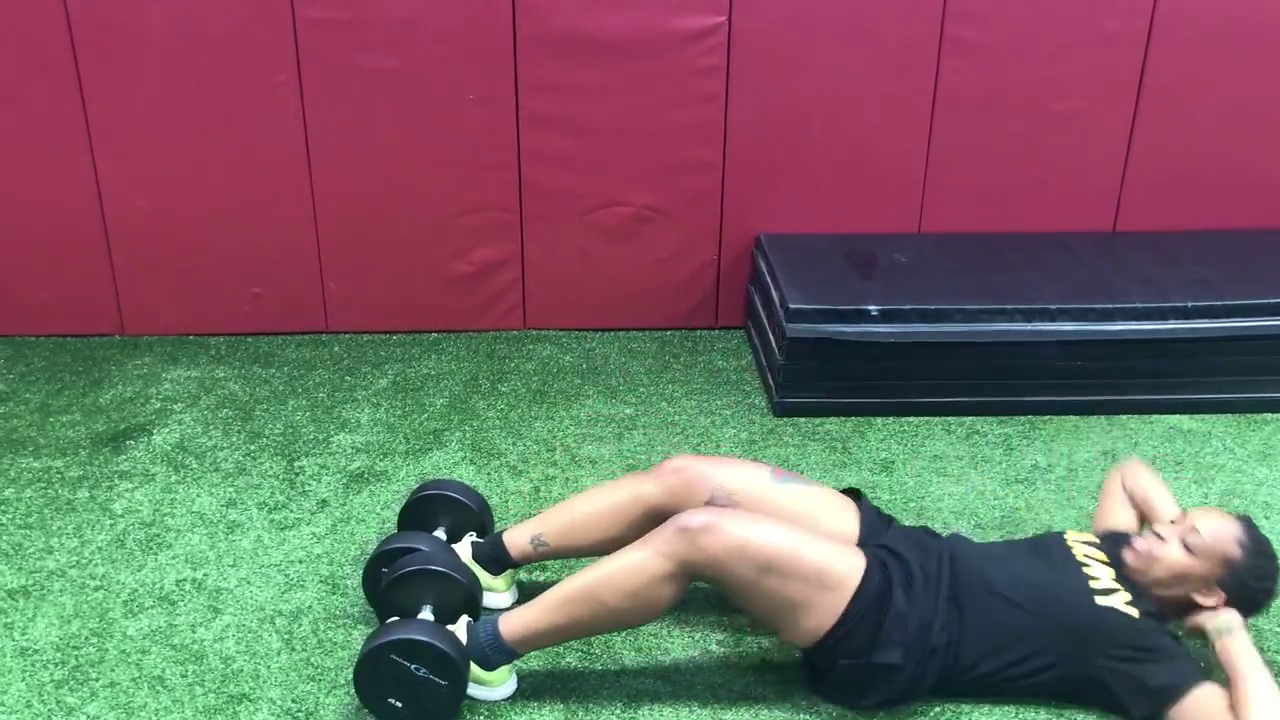

Millisecond: 252.56


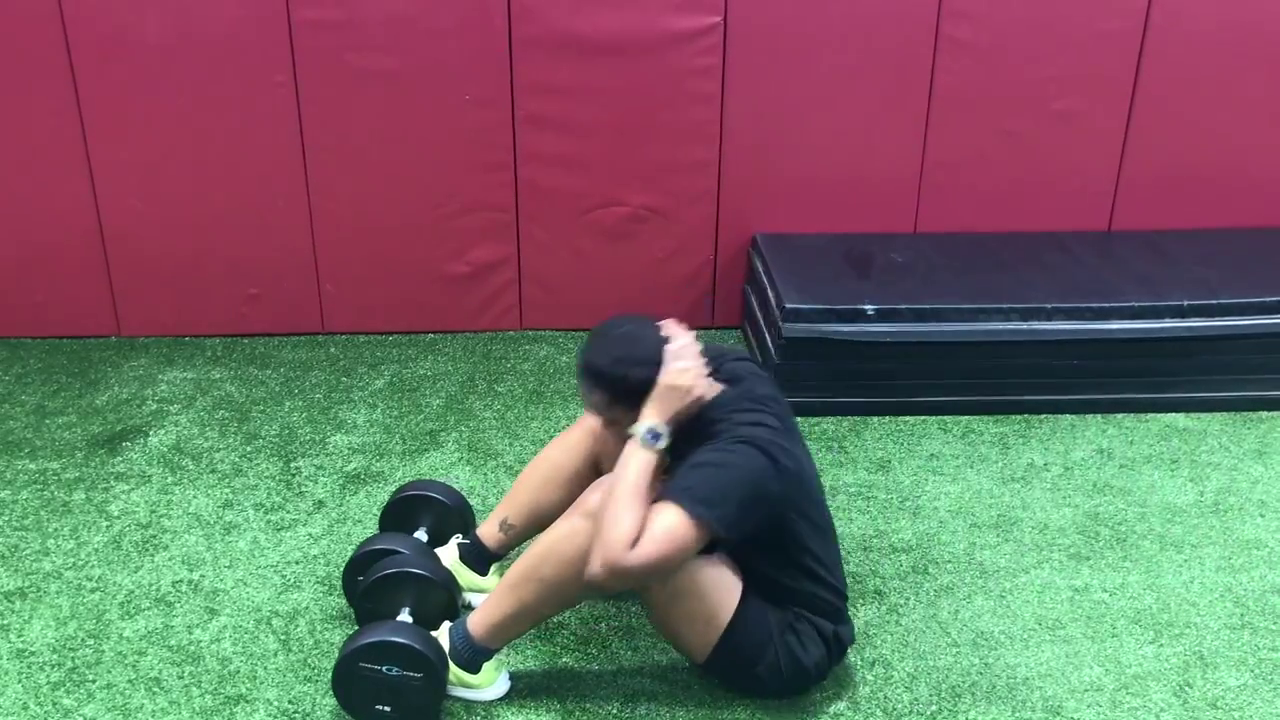

In [ ]:
if __name__ == '__main__':

    video_url = input('URL : ')

    ydl_opts = {}

    # create youtube-dl object
    ydl = youtube_dl.YoutubeDL(ydl_opts)

    # set video url, extract video information
    info_dict = ydl.extract_info(video_url, download=False)

    # get video formats available
    formats = info_dict.get('formats',None)

    for f in formats:

        # Choose video resolution
        if f.get('format_note',None) == '720p':
          break

    #get the video url
    url = f.get('url',None)

    # open url with opencv
    cap = cv2.VideoCapture(url)

    # check if url was opened
    if not cap.isOpened():
        print('video not opened')
        exit(-1)

    # convert millisecond to frame
    fps = cap.get(5)
    frame_list = []
    for second in second_list:
      frame_no = int(second * fps)
      frame_list.append(frame_no)

    for i in range(len(frame_list)):
      # set frame
      cap.set(1,frame_list[i])

      # read frame
      ret, frame = cap.read()

      # print timestamp
      print('Millisecond:', second_list[i])

      # display frame
      # cv2.imshow(frame)

      # display frame in Google Colab
      cv2_imshow(frame)
      
      # save frame
      filename = str(file_no)
      for i in range(3-len(filename)):
        filename = '0'+filename
      cv2.imwrite('image_'+filename+'.jpg', frame)
      
      # add counter
      file_no+=1

    # release VideoCapture
    cap.release()

    cv2.destroyAllWindows()
